# Exploring marriages and divorces in Jamaica

Data from The Statistical Institute of Jamaica

First importing relevant libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sb

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

from pandas import DataFrame as df
import requests
from bs4 import BeautifulSoup

Getting data from the STATIN website

In [138]:
response = requests.get("https://www.datazoa.com/data/table.asp?a=view&th=2742AB0EE8&dzuuid=1838&uid=dzadmin")
content = response.content
soup = BeautifulSoup(content, 'html.parser')
results = soup.find(class_ = 'dz-embed')
content = results.find_all('span')

Cleaning the data

In [139]:
clean_data = ""
x = 0
frame = []
for data in content[:-16]:
    clean_data += data.text.strip() + '|'
    clean_data = clean_data.replace(",", "")
    clean_data = clean_data.replace(".0", "")
    x += 1
    if x == 6:
        frame.append(list(map(int,clean_data.split('|')[:-1])))
        #frame.append(clean_data.split('|')[:-1])
        clean_data = ""
        x = 0


Great, now to split up, label and put into a Pandas DataFrame

In [140]:
males = frame[0:7]
females = frame[7:]
columns = [x for x in range(2013,2019)]
arr = np.array(males + females)

side = ['Total', 'Under_20', '20-29', '30-39', '40-49', '50-59', '60_and_over']
data = df(arr, columns=columns, index=side+side)
data



,2013,2014,2015,2016,2017,2018
Total,18835,18699,18323,17609,17411,16719
Under_20,39,39,34,25,31,20
20-29,4905,4780,4531,4277,4219,3958
30-39,6877,6845,6614,6157,5923,5685
40-49,4033,4138,4087,3989,3927,3738
50-59,2113,2035,2124,2214,2236,2328
60_and_over,868,862,933,947,1075,990
Total,18835,18699,18319,17609,17411,16719
Under_20,188,176,190,133,139,120
20-29,6596,6489,6150,5738,5549,5192


Time to have some fun with the numbers

<AxesSubplot:>

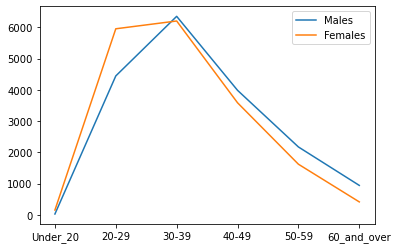

In [141]:
males = data.loc[data[2013] < 18000].head(6)
males

females = data.loc[data[2013] < 18000].tail(6)
females

males['mean'] = males.mean(axis=1)
males
females['mean'] = females.mean(axis=1)

cross = pd.concat([males['mean'], females['mean']], axis=1, keys=['Males', 'Females'])
cross.plot()

So women seem to get married earlier in life, but do not get married as readily later in life as men do. At around age 30, both sexes marry at similar rates.

<AxesSubplot:>

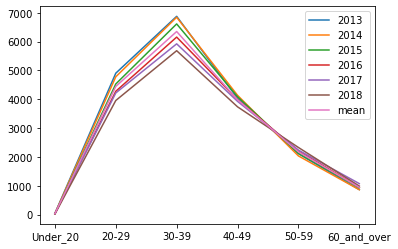

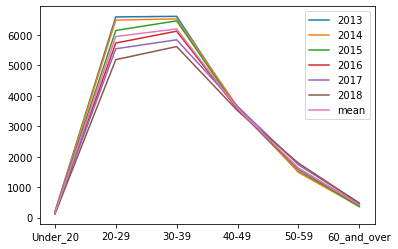

In [142]:
males.plot()
females.plot()

These graphs show that marriage rates were higher in earlier than later years on the data set. Noticeably more women in their 30s got married in their 20s due to the positive slope between those two years becoming more prominent.

Let's import some economic data to see if we can find any insights. Starting with GDP data from STATIN, I'm just copying and pasting for expediency right now. 

In [143]:
gdp = pd.Series(np.array([1501306,1599279,1676198,1830764,1931886]), index=columns[1:])
#From https://statinja.gov.jm/NationalAccounting/Annual/NewAnnualGDP.aspx
gdp

2014    1501306
2015    1599279
2016    1676198
2017    1830764
2018    1931886
dtype: int32

In [144]:
marriages = pd.Series(males.sum(axis=0)[1:-1], dtype=int)
marriages.corr(gdp)

-0.9724644085601676

Although further statistical analysis is necessary to contextualize this result (due to the small sample size), there seems to be a very strong negative correlation between GDP and marriage rates. Who would have thought? :)

<AxesSubplot:>

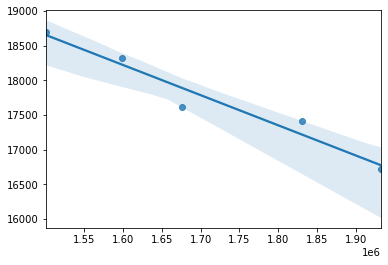

In [145]:
sb.regplot(x=gdp, y=marriages)

This helps to visualize how marriage rates declined with GDP. Testing on a larger dataset would yield more insightful results, but alas this was me practicing some data cleaning and exploratory analysis.